In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [5]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

629

In [6]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [7]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=7b3aa176c0f6f7cc08ca52d635ca14ce


In [8]:
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

In [9]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | maningrida
Processing Record 2 of Set 1 | avarua
Processing Record 3 of Set 1 | ostrovnoy
Processing Record 4 of Set 1 | almoloya
Processing Record 5 of Set 1 | jamestown
Processing Record 6 of Set 1 | cape town
Processing Record 7 of Set 1 | mount gambier
Processing Record 8 of Set 1 | saint-marc-des-carrieres
Processing Record 9 of Set 1 | illoqqortoormiut
City not found. Skipping...
Processing Record 10 of Set 1 | punta arenas
Processing Record 11 of Set 1 | mataura
Processing Record 12 of Set 1 | busselton
Processing Record 13 of Set 1 | hithadhoo
Processing Record 14 of Set 1 | mergui
City not found. Skipping...
Processing Record 15 of Set 1 | broken hill
Processing Record 16 of Set 1 | itoman
Processing Record 17 of Set 1 | victoria
Processing Record 18 of Set 1 | butaritari
Processing Record 19 of Set 1 | auki
Processing Record 20 of Set 1 | saint-philippe
Processing Record 21 of Set 1 | s

Processing Record 37 of Set 4 | thinadhoo
Processing Record 38 of Set 4 | liniere
City not found. Skipping...
Processing Record 39 of Set 4 | iracoubo
Processing Record 40 of Set 4 | loandjili
Processing Record 41 of Set 4 | sovetskiy
Processing Record 42 of Set 4 | esperance
Processing Record 43 of Set 4 | namatanai
Processing Record 44 of Set 4 | saint george
Processing Record 45 of Set 4 | voh
Processing Record 46 of Set 4 | mozarlandia
Processing Record 47 of Set 4 | talnakh
Processing Record 48 of Set 4 | gomel
Processing Record 49 of Set 4 | carutapera
Processing Record 50 of Set 4 | nome
Processing Record 1 of Set 5 | longyearbyen
Processing Record 2 of Set 5 | hilo
Processing Record 3 of Set 5 | karabulak
Processing Record 4 of Set 5 | bela vista de goias
Processing Record 5 of Set 5 | fallon
Processing Record 6 of Set 5 | fort portal
Processing Record 7 of Set 5 | vostok
Processing Record 8 of Set 5 | gimli
Processing Record 9 of Set 5 | okitipupa
Processing Record 10 of Set 5

Processing Record 26 of Set 8 | finschhafen
Processing Record 27 of Set 8 | balabac
Processing Record 28 of Set 8 | yabrud
Processing Record 29 of Set 8 | popondetta
Processing Record 30 of Set 8 | yakuplu
Processing Record 31 of Set 8 | catuday
Processing Record 32 of Set 8 | izumo
Processing Record 33 of Set 8 | provideniya
Processing Record 34 of Set 8 | woodward
Processing Record 35 of Set 8 | beloha
Processing Record 36 of Set 8 | mama
Processing Record 37 of Set 8 | cam ranh
Processing Record 38 of Set 8 | hovd
Processing Record 39 of Set 8 | asau
Processing Record 40 of Set 8 | nhulunbuy
Processing Record 41 of Set 8 | olinda
Processing Record 42 of Set 8 | palana
Processing Record 43 of Set 8 | surt
Processing Record 44 of Set 8 | ilulissat
Processing Record 45 of Set 8 | dapaong
Processing Record 46 of Set 8 | karpogory
Processing Record 47 of Set 8 | kenora
Processing Record 48 of Set 8 | kutum
Processing Record 49 of Set 8 | safaga
Processing Record 50 of Set 8 | tura
Proces

Processing Record 17 of Set 12 | juifang
City not found. Skipping...
Processing Record 18 of Set 12 | praya
Processing Record 19 of Set 12 | amurzet
Processing Record 20 of Set 12 | kurchum
Processing Record 21 of Set 12 | aleksandrovsk-sakhalinskiy
Processing Record 22 of Set 12 | adrar
Processing Record 23 of Set 12 | gawler
Processing Record 24 of Set 12 | manono
Processing Record 25 of Set 12 | iskateley
Processing Record 26 of Set 12 | finnsnes
Processing Record 27 of Set 12 | warmbad
Processing Record 28 of Set 12 | kirkenaer
Processing Record 29 of Set 12 | oktyabrskiy
Processing Record 30 of Set 12 | telma
Processing Record 31 of Set 12 | vangaindrano
Processing Record 32 of Set 12 | trat
Processing Record 33 of Set 12 | semibratovo
Processing Record 34 of Set 12 | pokhara
Processing Record 35 of Set 12 | mogadishu
Processing Record 36 of Set 12 | dingle
Processing Record 37 of Set 12 | klenovyy
Processing Record 38 of Set 12 | yulara
Processing Record 39 of Set 12 | otradnoye


In [10]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Maningrida,-12.0667,134.2667,82.45,68,31,8.66,AU,2021-11-20 15:44:49
1,Avarua,-21.2078,-159.7750,73.45,78,36,6.91,CK,2021-11-20 15:42:14
2,Ostrovnoy,68.0531,39.5131,32.59,79,100,12.06,RU,2021-11-20 15:44:50
3,Almoloya,19.7000,-98.4000,54.97,61,58,3.15,MX,2021-11-20 15:44:50
4,Jamestown,42.0970,-79.2353,39.02,70,1,8.01,US,2021-11-20 15:40:33
5,Cape Town,-33.9258,18.4232,76.12,49,20,19.57,ZA,2021-11-20 15:40:29
6,Mount Gambier,-37.8333,140.7667,40.91,93,1,0.00,AU,2021-11-20 15:44:50
7,Saint-Marc-Des-Carrieres,46.6834,-72.0491,34.21,56,28,6.64,CA,2021-11-20 15:44:50
8,Punta Arenas,-53.1500,-70.9167,46.51,53,40,42.57,CL,2021-11-20 15:42:55
9,Mataura,-46.1927,168.8643,50.31,99,100,3.00,NZ,2021-11-20 15:44:51


In [11]:
# Reorder the columns in the order you want them to appear
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
# Assign city data df the new column order
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Maningrida,AU,2021-11-20 15:44:49,-12.0667,134.2667,82.45,68,31,8.66
1,Avarua,CK,2021-11-20 15:42:14,-21.2078,-159.7750,73.45,78,36,6.91
2,Ostrovnoy,RU,2021-11-20 15:44:50,68.0531,39.5131,32.59,79,100,12.06
3,Almoloya,MX,2021-11-20 15:44:50,19.7000,-98.4000,54.97,61,58,3.15
4,Jamestown,US,2021-11-20 15:40:33,42.0970,-79.2353,39.02,70,1,8.01
5,Cape Town,ZA,2021-11-20 15:40:29,-33.9258,18.4232,76.12,49,20,19.57
6,Mount Gambier,AU,2021-11-20 15:44:50,-37.8333,140.7667,40.91,93,1,0.00
7,Saint-Marc-Des-Carrieres,CA,2021-11-20 15:44:50,46.6834,-72.0491,34.21,56,28,6.64
8,Punta Arenas,CL,2021-11-20 15:42:55,-53.1500,-70.9167,46.51,53,40,42.57
9,Mataura,NZ,2021-11-20 15:44:51,-46.1927,168.8643,50.31,99,100,3.00


In [12]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [14]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

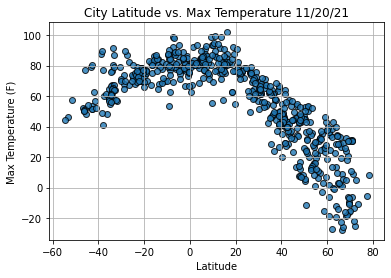

In [15]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

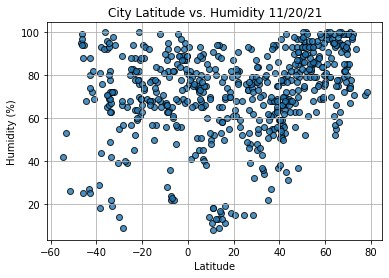

In [16]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

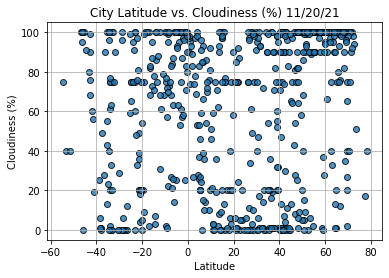

In [17]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

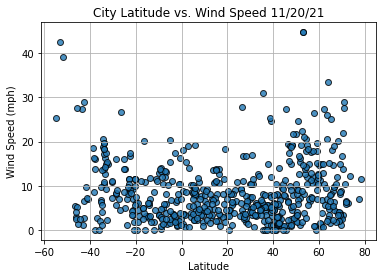

In [18]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [19]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()


In [21]:
index13 = city_data_df.loc[13]
index13

City                       Itoman
Country                        JP
Date          2021-11-20 15:44:52
Lat                       26.1247
Lng                      127.6694
Max Temp                    75.58
Humidity                       73
Cloudiness                     75
Wind Speed                   9.22
Name: 13, dtype: object

In [22]:
city_data_df["Lat"] >= 0

0      False
1      False
2       True
3       True
4       True
       ...  
575     True
576     True
577    False
578     True
579     True
Name: Lat, Length: 580, dtype: bool

In [23]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
2,Ostrovnoy,RU,2021-11-20 15:44:50,68.0531,39.5131,32.59,79,100,12.06
3,Almoloya,MX,2021-11-20 15:44:50,19.7000,-98.4000,54.97,61,58,3.15
4,Jamestown,US,2021-11-20 15:40:33,42.0970,-79.2353,39.02,70,1,8.01
7,Saint-Marc-Des-Carrieres,CA,2021-11-20 15:44:50,46.6834,-72.0491,34.21,56,28,6.64
13,Itoman,JP,2021-11-20 15:44:52,26.1247,127.6694,75.58,73,75,9.22


In [24]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

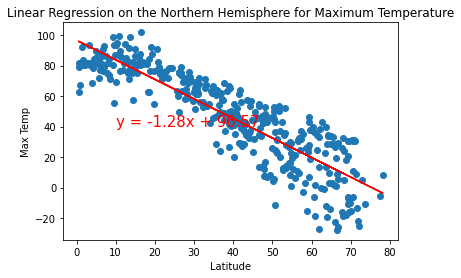

In [27]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for Maximum Temperature', 'Max Temp',(10,40))

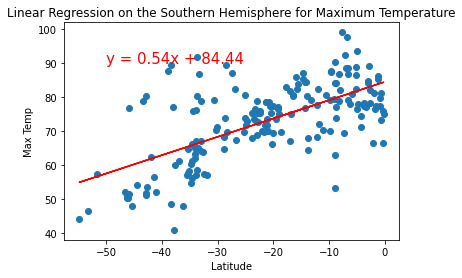

In [31]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for Maximum Temperature', 'Max Temp',(-50,90))

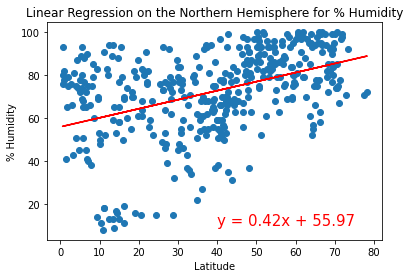

In [35]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for % Humidity', '% Humidity',(40,10))

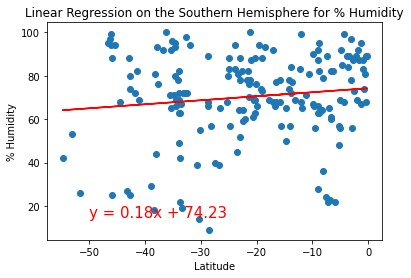

In [37]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for % Humidity', '% Humidity',(-50,15))

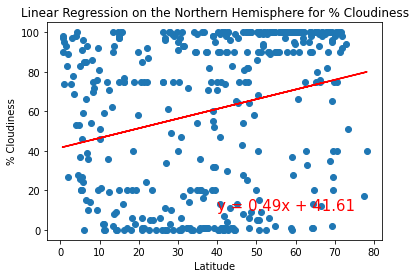

In [38]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for % Cloudiness', '% Cloudiness',(40,10))

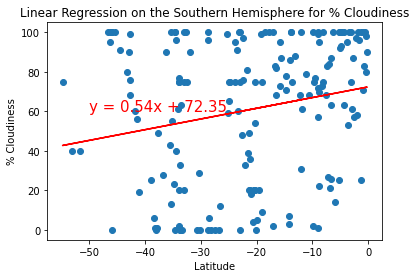

In [40]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for % Cloudiness', '% Cloudiness',(-50,60))

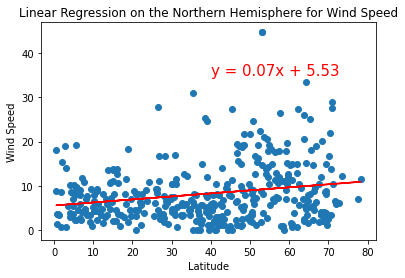

In [43]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for Wind Speed', 'Wind Speed',(40,35))

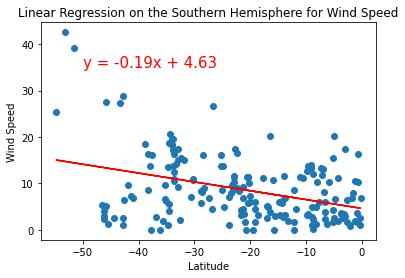

In [46]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for Wind Speed', 'Wind Speed',(-50,35))